In [1]:
### Created by Ian Nesbitt, University of Maine, using RaspberryShake UDP documentation:
### https://manual.raspberryshake.org/udp.html

### Live updating plot created using the following as a template:
### https://github.com/anujgupta82/Musings/blob/master/Dynamic%20or%20Live%20update%20of%20a%20Plot.ipynb

In [2]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
%matplotlib notebook

In [ ]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
%matplotlib notebook

# NOTE: I don't know why, but you have to run the import cells twice in order for this to work.
# If someone can figure out why, or find a less dirty workaround, please let me know.
# ian dot nesbitt at gmail dot com

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Waiting for data on Port: 18002


<IPython.core.display.Javascript object>


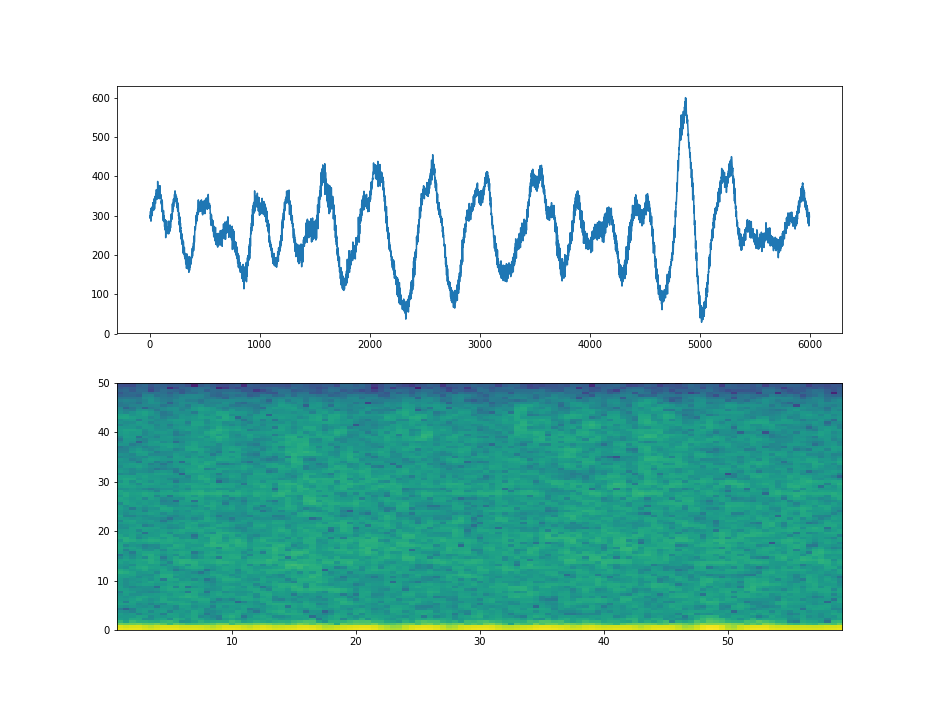

/home/iannesbitt/anaconda3/lib/python3.6/site-packages/matplotlib/mlab.py:1274: UserWarning: Only one segment is calculated since parameter NFFT (=200) >= signal length (=25).
  "(=%d) >= signal length (=%d)." % (NFFT, len(x)))
/home/iannesbitt/anaconda3/lib/python3.6/site-packages/matplotlib/mlab.py:1274: UserWarning: Only one segment is calculated since parameter NFFT (=200) >= signal length (=50).
  "(=%d) >= signal length (=%d)." % (NFFT, len(x)))
/home/iannesbitt/anaconda3/lib/python3.6/site-packages/matplotlib/mlab.py:1274: UserWarning: Only one segment is calculated since parameter NFFT (=200) >= signal length (=75).
  "(=%d) >= signal length (=%d)." % (NFFT, len(x)))
/home/iannesbitt/anaconda3/lib/python3.6/site-packages/matplotlib/mlab.py:1274: UserWarning: Only one segment is calculated since parameter NFFT (=200) >= signal length (=100).
  "(=%d) >= signal length (=%d)." % (NFFT, len(x)))
/home/iannesbitt/anaconda3/lib/python3.6/site-packages/matplotlib/mlab.py:1274: UserWar

In [ ]:
import socket as s
import matplotlib.pyplot as plt

ch = 'EHZ'                               # pick your favorite channel
freq = 100                               # sampling frequency in Hz of rshake (1D = 50; 3D & 4D = 100)
host = ''                                # blank for localhost (data is being sent here by remote Shake!)
port = 18002                             # Port to bind to
sock = s.socket(s.AF_INET, s.SOCK_DGRAM | s.SO_REUSEADDR)
sock.bind((host, port))
print('Waiting for data on Port:', port)


#initialize the graph and settings
fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(13,10))
plt.ion()

fig.show()
fig.canvas.draw()

stream = []                             # our stream (simple list object)

while 1:                                # loop forever
    data, addr = sock.recvfrom(1024)    # wait to receive data
    s = data.decode('UTF-8').strip("'{} ").split(', ') # clean and listify the data
    if ch in s[0]:                      # only listen to the specific channel
        ax1.clear()                     # ready the plot axis for a new draw
        ax2.clear()                     # same for the spectrogram axis
        #ax.set(title='RaspberryShake live UDP output', xlabel='Samples', ylabel='Counts')
        for smp in s[2:]:               # convert strings
            stream.append(int(smp))
        if len(stream) > 6000:          # 6000 samples per minute
            stream = stream[-6000:]     # move the array to the right, get rid of old samples
        ax1.plot(stream)
        ax2.specgram(stream, NFFT=freq*2, Fs=freq, noverlap=freq*1.5)
        fig.canvas.draw()

In [ ]:
ax.clear()
ax.plot(stream)
#ax.specgram(stream, NFFT=200, Fs=100, noverlap=150)
fig.canvas.draw()